## EEG-Based Game Rating Classification (PEGI & ESRB)



### DEFNE TURĞUT 221805084

### DATA ANALYSE

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#exceldeki veriyi oku
data = pd.read_excel("04-EEG-Based Game Rating Classification (PEGI & ESRB).xlsx")
data.head(10)

PEGI    ESRB  RMS_50_EEG.AF3  MAX_50_EEG.AF3  MIN_50_EEG.AF3  \
0    12    teen        1.271920       -0.296349       -1.966410   
1    12    teen        1.260510        1.949350        0.417872   
2    12    teen        1.639400        2.041750        1.315090   
3    12    teen        1.452530       -0.219947       -2.419460   
4    12    teen        0.280988        0.568889       -0.138220   
5    12    teen        1.641030        2.009770        1.384380   
6    18  mature        0.310865        0.593763       -0.630361   
7    18  mature        0.448585        0.117618       -0.736955   
8    18  mature        0.198157        0.391225       -0.356754   
9    18  mature        0.435647        0.167366       -0.728078   

   MA_50_EEG.AF3  STD_50_EEG.AF3  PTP_50_EEG.AF3  Kurtosis_50_EEG.AF3  \
0      -1.187020        0.456894        1.670060            -0.882631   
1       1.198790        0.389617        1.531480            -0.880739   
2       1.629100        0.183527        0.726658            -0.714075   
3      -1.355240        0.522655        2.199510            -0.436060   
4       0.227379        0.165085        0.707109            -0.490836   
5       1.635810        0.130713        0.625389             0.269630   
6       0.051951        0.306493        1.224120            -0.708447   
7      -0.407885        0.186703        0.854573             0.337838   
8       0.051987        0.191216        0.747979            -0.881260   
9      -0.390260        0.193610        0.895444             0.186552   

   ZeroCrossing_50_EEG.AF3  CrestFactor_50_EEG.AF3  RMS_100_EEG.AF3  \
0                      0.0                 1.54602         1.799350   
1                      0.0                 1.54648         0.946977   
2                      0.0                 1.24542         1.664260   
3                      0.0                 1.66569         1.333690   
4                      4.0                 2.02460         0.754358   
5                      0.0                 1.22470         1.421900   
6                      7.0                 2.02777         0.351628   
7                      2.0                 1.64285         0.379832   
8                      7.0                 1.97432         0.297993   
9                      3.0                 1.67126         0.368180   

   MAX_100_EEG.AF3  MIN_100_EEG.AF3  MA_100_EEG.AF3  STD_100_EEG.AF3  \
0        -0.296349        -2.623780       -1.690510         0.616302   
1         1.949350        -0.635687        0.733835         0.598541   
2         2.143010         1.315090        1.652440         0.197941   
3         1.398590        -2.419460       -0.766363         1.091530   
4         0.568889        -1.540010       -0.355989         0.665077   
5         2.009770         0.483609        1.378620         0.348144   
6         0.879807        -0.674777        0.051596         0.347822   
7         0.490714        -0.825794       -0.224533         0.306361   
8         0.391225        -0.742288       -0.110649         0.276688   
9         0.542242        -0.728078       -0.221246         0.294291   

   PTP_100_EEG.AF3  Kurtosis_100_EEG.AF3  ZeroCrossing_100_EEG.AF3  \
0         2.327430             -0.900485                       0.0   
1         2.585040             -0.768589                       3.0   
2         0.827927             -0.654962                       0.0   
3         3.818050             -0.585021                       1.0   
4         2.108900             -1.332360                       5.0   
5         1.526160             -0.625779                       0.0   
6         1.554580             -0.526640                      12.0   
7         1.316510             -0.725587                       8.0   
8         1.133510             -0.747734                      14.0   
9         1.270320             -0.500396                      15.0   

   CrestFactor_100_EEG.AF3  RMS_200_EEG.AF3  MAX_200_EEG.AF3  MIN_200_EEG.AF3  \
0                  1.45818        

In [ ]:
#dataset genel bilgileri yazdır
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 2270 entries, PEGI to CrestFactor_200_POW.AF4.Gamma
dtypes: float64(2242), int64(27), object(1)
memory usage: 15.6+ MB


In [ ]:
#dataset satır ve sütun sayısı yazdır
data.shape

(900, 2270)

In [ ]:
#ilk 20 sütun ismini listele
print(data.columns.tolist()[:20]) 

['PEGI', 'ESRB', 'RMS_50_EEG.AF3', 'MAX_50_EEG.AF3', 'MIN_50_EEG.AF3', 'MA_50_EEG.AF3', 'STD_50_EEG.AF3', 'PTP_50_EEG.AF3', 'Kurtosis_50_EEG.AF3', 'ZeroCrossing_50_EEG.AF3', 'CrestFactor_50_EEG.AF3', 'RMS_100_EEG.AF3', 'MAX_100_EEG.AF3', 'MIN_100_EEG.AF3', 'MA_100_EEG.AF3', 'STD_100_EEG.AF3', 'PTP_100_EEG.AF3', 'Kurtosis_100_EEG.AF3', 'ZeroCrossing_100_EEG.AF3', 'CrestFactor_100_EEG.AF3']


In [ ]:
pd.set_option("display.max_rows", None)  # Tüm satırları göstermek için
pd.set_option("display.max_columns", None)  # Tüm sütunları göstermek için 
#Her sütundaki null değer sayısını yazdır
print("Eksik değerler:")
data.isnull().sum().sort_values(ascending=False)

Eksik değerler:


MIN_200_POW.O2.Theta              41
MAX_200_POW.O2.Theta              18
MA_200_POW.O2.Theta               12
ESRB                               0
RMS_50_EEG.AF3                     0
MAX_50_EEG.AF3                     0
MIN_50_EEG.AF3                     0
MA_50_EEG.AF3                      0
STD_50_EEG.AF3                     0
PTP_50_EEG.AF3                     0
Kurtosis_50_EEG.AF3                0
ZeroCrossing_50_EEG.AF3            0
CrestFactor_50_EEG.AF3             0
RMS_100_EEG.AF3                    0
MIN_100_POW.AF4.Gamma              0
PTP_200_POW.AF4.BetaH              0
Kurtosis_200_POW.AF4.BetaH         0
ZeroCrossing_200_POW.AF4.BetaH     0
CrestFactor_200_POW.AF4.BetaH      0
RMS_50_POW.AF4.Gamma               0
MAX_50_POW.AF4.Gamma               0
MIN_50_POW.AF4.Gamma               0
MA_50_POW.AF4.Gamma                0
STD_50_POW.AF4.Gamma               0
PTP_50_POW.AF4.Gamma               0
Kurtosis_50_POW.AF4.Gamma          0
ZeroCrossing_50_POW.AF4.Gamma      0
C

In [ ]:
# 0 içeren sütunları yazdır
zero_values = (data == 0).sum()
print("Sıfır Değerler:\n", zero_values[zero_values > 0].sort_values(ascending=False))

Sıfır Değerler:
 ZeroCrossing_50_POW.P8.Gamma      900
ZeroCrossing_200_POW.P8.Gamma     900
ZeroCrossing_100_POW.P8.Gamma     900
ZeroCrossing_100_POW.O2.BetaH     900
ZeroCrossing_200_POW.O2.BetaH     900
ZeroCrossing_50_POW.O2.BetaH      900
ZeroCrossing_50_POW.AF4.Gamma     899
ZeroCrossing_100_POW.AF4.Gamma    899
ZeroCrossing_50_POW.AF4.BetaH     899
ZeroCrossing_50_POW.AF4.BetaL     899
ZeroCrossing_50_POW.AF4.Alpha     899
ZeroCrossing_100_POW.AF4.BetaL    898
ZeroCrossing_100_POW.AF4.BetaH    898
ZeroCrossing_200_POW.AF4.Gamma    898
ZeroCrossing_50_POW.T8.Gamma      898
ZeroCrossing_100_POW.AF4.Alpha    897
ZeroCrossing_200_POW.AF4.BetaH    897
ZeroCrossing_50_POW.T7.Alpha      896
ZeroCrossing_200_POW.AF4.BetaL    896
ZeroCrossing_50_POW.F4.Gamma      896
ZeroCrossing_100_POW.F4.Gamma     896
ZeroCrossing_100_POW.T7.Alpha     895
ZeroCrossing_50_POW.T7.Theta      895
ZeroCrossing_200_POW.AF4.Alpha    894
ZeroCrossing_50_POW.O2.Gamma      894
ZeroCrossing_50_POW.T7.BetaL     

In [ ]:
#target sütunları incele boş değer kontrolü yap
print("PEGI Sütunu unique değer sayısı", data['PEGI'].nunique())
print("PEGI Sütunu unique değerlerin isimleri:",data['PEGI'].unique())
print("ESRB Sütunu unique değer sayısı", data['ESRB'].nunique())
print("ESRB Sütunu unique değerlerin isimleri:",data['ESRB'].unique())

print(data['ESRB'].isna().sum())
print(data['PEGI'].isna().sum())

PEGI Sütunu unique değer sayısı 5
PEGI Sütunu unique değerlerin isimleri: [12 18 16  3  7]
ESRB Sütunu unique değer sayısı 3
ESRB Sütunu unique değerlerin isimleri: ['teen' 'mature' 'everyone']
0
0


In [ ]:
#veri setinin sayısal sütunlarının istatistik bilgilerini incele
data.describe()

PEGI  RMS_50_EEG.AF3  MAX_50_EEG.AF3  MIN_50_EEG.AF3  \
count  900.000000      900.000000      900.000000      900.000000   
mean    11.140000        0.555750        0.493747       -0.447090   
std      5.606722        0.692223        0.943914        0.891645   
min      3.000000        0.075874       -8.577380      -10.366500   
25%      7.000000        0.202643        0.113620       -0.630361   
50%     12.000000        0.324627        0.373456       -0.348760   
75%     16.000000        0.651466        0.736787       -0.107576   
max     18.000000        9.206480        6.309290        3.589220   

       MA_50_EEG.AF3  STD_50_EEG.AF3  PTP_50_EEG.AF3  Kurtosis_50_EEG.AF3  \
count     900.000000      900.000000      900.000000           900.000000   
mean       -0.012278        0.243468        0.940837            -0.237258   
std         0.823552        0.225041        0.749644             1.003203   
min        -9.192600        0.065256        0.275387            -1.691550   
25%        -0.227554        0.128005        0.541437            -0.822181   
50%         0.003342        0.172955        0.713328            -0.430813   
75%         0.237551        0.246677        0.993603             0.072679   
max         4.384600        2.107750        6.893460            10.033700   

       ZeroCrossing_50_EEG.AF3  CrestFactor_50_EEG.AF3  RMS_100_EEG.AF3  \
count               900.000000              900.000000       900.000000   
mean                  4.168889                1.969623         0.583195   
std                   4.784142                0.472620         0.710506   
min                   0.000000                1.073100         0.088065   
25%                   0.000000                1.616083         0.223741   
50%                   3.000000                1.942165         0.354815   
75%                   7.000000                2.298430         0.674024   
max                  25.000000                4.027560        10.271000   

       MAX_100_EEG.AF3  MIN_100_EEG.AF3  MA_100_EEG.AF3  STD_100_EEG.AF3  \
count       900.000000       900.000000      900.000000       900.000000   
mean          0.756807        -0.611580       -0.004666         0.332923   
std           0.990359         0.975090        0.786997         0.339065   
min          -8.577380       -11.995700      -10.208300         0.080366   
25%           0.289956        -0.746285       -0.178189         0.160265   
50%           0.536910        -0.458020        0.006158         0.225014   
75%           1.072132        -0.230166        0.202515         0.384234   
max           8.100170         2.606720        4.327920         4.479400   

       PTP_100_EEG.AF3  Kurtosis_100_EEG.AF3  ZeroCrossing_100_EEG.AF3  \
count       900.000000            900.000000                900.000000   
mean          1.368387              0.103633                  8.516667   
std           1.101399              1.620917                  8.299775   
min           0.387306             -1.705760                  0.000000   
25%           0.735098             -0.716159                  1.000000   
50%           1.010030             -0.320642                  7.000000   
75%           1.619428              0.214763                 14.000000   
max          11.925000             13.035300                 47.000000   

       CrestFactor_100_EEG.AF3  RMS_200_EEG.AF3  MAX_200_EEG.AF3  \
count               900.000000       900.000000       900.000000   
mean                  2.256498         0.628057         1.107051   
std                   0.605790         0.752610         1.099574   
min                   1.167920         0.099050        -8.577380   
25%                   1.814137         0.248676         0.462288   
50%                   2.211690         0.414976         0.775872   
75%                   2.574375         0.724485         1.553160   
max                   4.941090        11.760400         8.100170   

       MIN_200_EEG.AF3  MA_200_EEG.AF3  STD_200_EEG.AF3 

### DATA PREPROCESSING

In [ ]:
from sklearn.impute import KNNImputer

# girdi data seti için target sütunlarını kaldır
eeg_features = data.drop(columns=['PEGI', 'ESRB'])
# Tamamen 0 olan sütunları bul
zero_columns = [col for col in eeg_features.columns if "ZeroCrossing" in col]
# hepsi 0 ola sütunları sil(modele bir katkısı olmaz)
eeg_features = eeg_features.drop(columns=zero_columns)

# 0 olan değerleri NaN ile değiştir
eeg_features_replaced = eeg_features.replace(0, np.nan)
# IQR hesapla
Q1 = eeg_features.quantile(0.25)
Q3 = eeg_features.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tespit et (True olanlar aykırı)
outliers = (eeg_features < (Q1 - 1.5 * IQR)) | (eeg_features > (Q3 + 1.5 * IQR))

# Aykırı değerleri NaN yap
eeg_features[outliers] = np.nan

# NaN değerleri Imputation ile doldur
imputer = KNNImputer(n_neighbors=5)
eeg_imputed = imputer.fit_transform(eeg_features_replaced)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Z-score normalizasyonu (StandardScaler)
scaler = StandardScaler()

# girdi dataseti için normalize et
eeg_scaled = scaler.fit_transform(eeg_imputed)

# Scaled EEG verisini DataFrame'e çevir
eeg_scaled_df = pd.DataFrame(eeg_scaled, columns=eeg_features.columns)
print(f"Normalizasyon sonrası X shape: {eeg_scaled_df.shape}")


Normalizasyon sonrası X shape: (900, 2016)


In [ ]:
from sklearn.preprocessing import LabelEncoder

y_PEGI = data['PEGI']
y_ESRB = data['ESRB']

# LabelEncoder ile hedef değişkenleri encode et
encoder = LabelEncoder()

# ESRB  VE PEGI için encoding
y_ESRB_encoded = encoder.fit_transform(y_ESRB)
y_PEGI_encoded = encoder.fit_transform(y_PEGI)

# Encoding sonrası ilk 5 örneği yazdır
print(f"Encoded y_ESRB: {y_ESRB_encoded[:10]}")
print(f"Encoded y_PEGI: {y_PEGI_encoded[:10]}")

Encoded y_ESRB: [2 2 2 2 2 2 1 1 1 1]
Encoded y_PEGI: [2 2 2 2 2 2 4 4 4 4]


In [ ]:
# 0 içeren sütun kaldı mı kontrol et 
zero_values = (eeg_scaled_df == 0).sum()
print("Sıfır Değerler:\n", zero_values[zero_values > 0].sort_values(ascending=False))

Sıfır Değerler:
 Series([], dtype: int64)


### TRAIN MODEL

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ['sqrt', 'log2']
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=5000, random_state=13),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['lbfgs', 'saga']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=13),
        "params": {
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan']
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [-1, 10, 20],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 6, 9]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=13),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    },
    "ExtraTrees": {
        "model": ExtraTreesClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=13),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    }
}


In [ ]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

def train_and_evaluate(X_train, X_test, y_train, y_test,problem_name):
    print(f"\n PROBLEM: {problem_name}\n")
    results = {}
    
    for name, mp in models_params.items():
        print(f"Model: {name} - Optimizasyon Başladı...")
        #grid search ile dictionaryden gelen her modeli ve parametreleri eğit en iyisini döndür
        clf = GridSearchCV(mp['model'], mp['params'], cv=3, n_jobs=-1, verbose=1)
        clf.fit(X_train, y_train)
        
        best_model = clf.best_estimator_
        preds = best_model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        
        print(f"{name} - En İyi Skor: {acc:.4f}")
        print(f"En İyi Parametreler: {clf.best_params_}\n")
        
        results[name] = {
            "best_score": acc,
            "best_params": clf.best_params_,
            "model": best_model
        }
        
    return results


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

def evaluate_with_different_k(X, y, k_values, problem_name):
    k_results = {}

    for k in k_values:
        print(f"\n{'='*40}\nK = {k} için işlem başlıyor...\n{'='*40}")

        # Özellik seçimi için baz model (örneğin LogisticRegression)
        base_model = LogisticRegression(max_iter=5000, random_state=13)
        #baz model ile rfe yardımıyla özellik seçimi
        selector = RFE(estimator=base_model, n_features_to_select=k, step=1)
        X_selected = selector.fit_transform(X, y)

        #seçilen verileri train test olarak ayır
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=13)

        #Model eğitimi fonksiyonunu çağır
        results = train_and_evaluate(X_train, X_test, y_train, y_test, f"{problem_name} (K={k})")

        #Sonuçları kaydet
        k_results[k] = {
            "results": results,
            "selected_features": selector.support_,
            "X_test": X_test,    
            "y_test": y_test
        }

    return k_results


In [ ]:
# K değerleri(k değerlerini artırınca başarı skoru beklenildiği ölçüde artmadığı için en az veri ile model eğitildi)
k_values = [20] 

# PEGI için istenilen özellik sayısı ile modelleri eğit
PEGI_results = evaluate_with_different_k(eeg_scaled_df, y_PEGI_encoded, k_values, "PEGI Tahmini")


K = 20 için işlem başlıyor...

 PROBLEM: PEGI Tahmini (K=20)

Model: RandomForest - Optimizasyon Başladı...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
RandomForest - En İyi Skor: 0.6444
En İyi Parametreler: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: LogisticRegression - Optimizasyon Başladı...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
LogisticRegression - En İyi Skor: 0.3444
En İyi Parametreler: {'C': 10, 'solver': 'saga'}

Model: XGBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:02:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - En İyi Skor: 0.6037
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

Model: DecisionTree - Optimizasyon Başladı...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
DecisionTree - En İyi Skor: 0.3185
En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

Model: KNN - Optimizasyon Başladı...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN - En İyi Skor: 0.7037
En İyi Parametreler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Model: LightGBM - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4204
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 20
[LightGBM] [Info] Start training from

c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


GradientBoosting - En İyi Skor: 0.5852
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

Model: SVM - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM - En İyi Skor: 0.4222
En İyi Parametreler: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Model: ExtraTrees - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
ExtraTrees - En İyi Skor: 0.6852
En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: AdaBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost - En İyi Skor: 0.2630
En İyi Parametreler: {'learning_rate': 0.5, 'n_estimators': 100}



In [ ]:
# ESRB için istenilen k değerleri ile modelleri eğit
ESRB_results = evaluate_with_different_k(eeg_scaled_df, y_ESRB_encoded, k_values, "ESRB Tahmini")


K = 20 için işlem başlıyor...

 PROBLEM: ESRB Tahmini (K=20)

Model: RandomForest - Optimizasyon Başladı...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
RandomForest - En İyi Skor: 0.6593
En İyi Parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Model: LogisticRegression - Optimizasyon Başladı...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
LogisticRegression - En İyi Skor: 0.6630
En İyi Parametreler: {'C': 0.1, 'solver': 'lbfgs'}

Model: XGBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - En İyi Skor: 0.6852
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Model: DecisionTree - Optimizasyon Başladı...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
DecisionTree - En İyi Skor: 0.5296
En İyi Parametreler: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: KNN - Optimizasyon Başladı...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN - En İyi Skor: 0.7000
En İyi Parametreler: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Model: LightGBM - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4205
[LightGBM] [Info] Number of data points in the train set: 630, number of used features: 20
[LightGBM] [Info] Start training from sc

c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM - En İyi Skor: 0.7148
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'subsample': 0.8}

Model: GradientBoosting - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GradientBoosting - En İyi Skor: 0.7296
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}

Model: SVM - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM - En İyi Skor: 0.6333
En İyi Parametreler: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Model: ExtraTrees - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
ExtraTrees - En İyi Skor: 0.7296
En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: AdaBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost - En İyi Skor: 0.6222
En İyi Parametreler: {'learning_rate': 0.5, 'n_estimators': 5

### MODEL EVALUATION AND VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import pandas as pd

#kaydedilen bilgiler ile accuracy karşılaştırmaları ile en iyi modeli bul
def get_best_model_info(results_dict):
    best_model_name, best_result = max(results_dict.items(), key=lambda item: item[1]['best_score'])

    best_info = {
        "model_name": best_model_name,
        "score": best_result['best_score'],
        "model": best_result['model'],
        "params": best_result['best_params']
    }
    return best_info
#en iyi modelin bilgilerini yazdır ve görselleştir
def plot_model_results(best_info, X_test, y_test, selected_features_mask, original_feature_names):
    print(f"Best model name: {best_info["model_name"]}")
    print(f"Best model accuracy: {best_info["score"]}")
    print(f"Best model params: {best_info["params"]}")
    
    model = best_info['model']
    preds = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Reds')
    plt.title(f"Confusion Matrix - {best_info['model_name']}")
    plt.show()

    # ROC Curve (sadece binary class ise)
    if len(np.unique(y_test)) == 2:
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve - {best_info['model_name']}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    # Seçilen Özellikler
    selected_features = np.array(original_feature_names)[selected_features_mask]
    print("\nSeçilen Özellikler (20 adet):")
    for f in selected_features:
        print(f"- {f}")

    # Bar plot ile görselleştirme
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = model.coef_.flatten()

    else:
        print("Bu modelde özellik önemi görselleştirilemiyor.")
        return

    feat_imp_df = pd.DataFrame({
        "Feature": selected_features,
        "Importance": np.abs(importances)  # Negatif olmasın diye mutlak değer aldık
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="mako")
    plt.title(f"Özellik Önem Grafiği - {best_info['model_name']}")
    plt.xlabel("Önem")
    plt.ylabel("Özellik")
    plt.tight_layout()
    plt.show()


Best model name: KNN
Best model accuracy: 0.7037037037037037
Best model params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


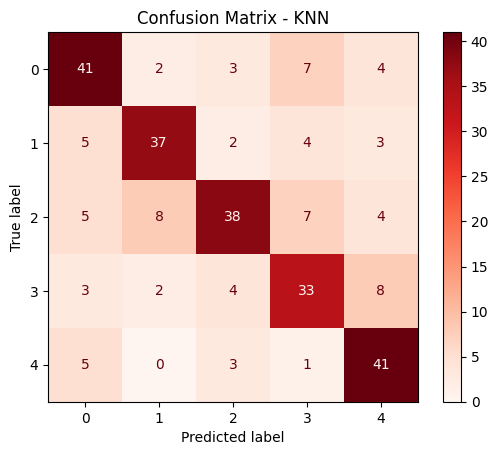


Seçilen Özellikler (20 adet):
- RMS_200_EEG.F7
- RMS_200_POW.AF3.Gamma
- MIN_200_POW.F7.Theta
- MIN_200_POW.F7.BetaH
- MA_50_POW.F7.Gamma
- STD_200_POW.F3.BetaH
- MIN_200_POW.F3.Gamma
- CrestFactor_50_POW.T7.BetaL
- CrestFactor_100_POW.T7.BetaH
- MA_200_POW.O1.Theta
- MIN_200_POW.O2.Theta
- RMS_200_POW.P8.Alpha
- MIN_200_POW.P8.BetaL
- RMS_200_POW.FC6.Theta
- MAX_200_POW.FC6.Theta
- MIN_200_POW.FC6.Theta
- MIN_100_POW.FC6.BetaH
- PTP_200_POW.FC6.Gamma
- MIN_200_POW.F4.BetaL
- MIN_50_POW.F8.Gamma
Bu modelde özellik önemi görselleştirilemiyor.


In [ ]:
#PEGI için en iyi modeli seç
k = 20
best_model_info = get_best_model_info(PEGI_results[k]["results"])
selected_mask = PEGI_results[k]["selected_features"]
X_test = PEGI_results[k]["X_test"]
y_test = PEGI_results[k]["y_test"]
#PEGI için model sonuçlarını çiz
plot_model_results(best_model_info, X_test, y_test, selected_mask, eeg_scaled_df.columns)


Best model name: GradientBoosting
Best model accuracy: 0.7296296296296296
Best model params: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100}


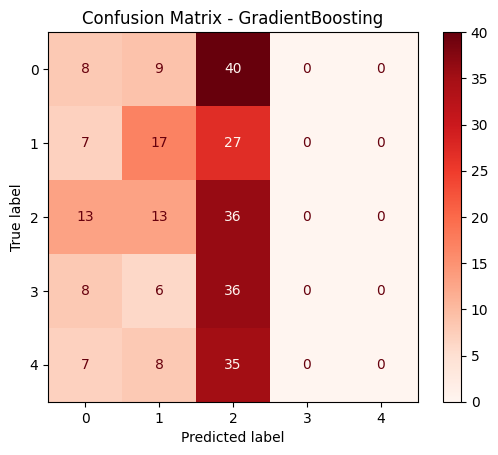


Seçilen Özellikler (20 adet):
- RMS_200_EEG.F7
- RMS_200_POW.AF3.Gamma
- MIN_200_POW.F7.Theta
- MIN_200_POW.F7.BetaH
- MA_50_POW.F7.Gamma
- STD_200_POW.F3.BetaH
- MIN_200_POW.F3.Gamma
- CrestFactor_50_POW.T7.BetaL
- CrestFactor_100_POW.T7.BetaH
- MA_200_POW.O1.Theta
- MIN_200_POW.O2.Theta
- RMS_200_POW.P8.Alpha
- MIN_200_POW.P8.BetaL
- RMS_200_POW.FC6.Theta
- MAX_200_POW.FC6.Theta
- MIN_200_POW.FC6.Theta
- MIN_100_POW.FC6.BetaH
- PTP_200_POW.FC6.Gamma
- MIN_200_POW.F4.BetaL
- MIN_50_POW.F8.Gamma


C:\Users\defne\AppData\Local\Temp\ipykernel_7952\2779559356.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="mako")


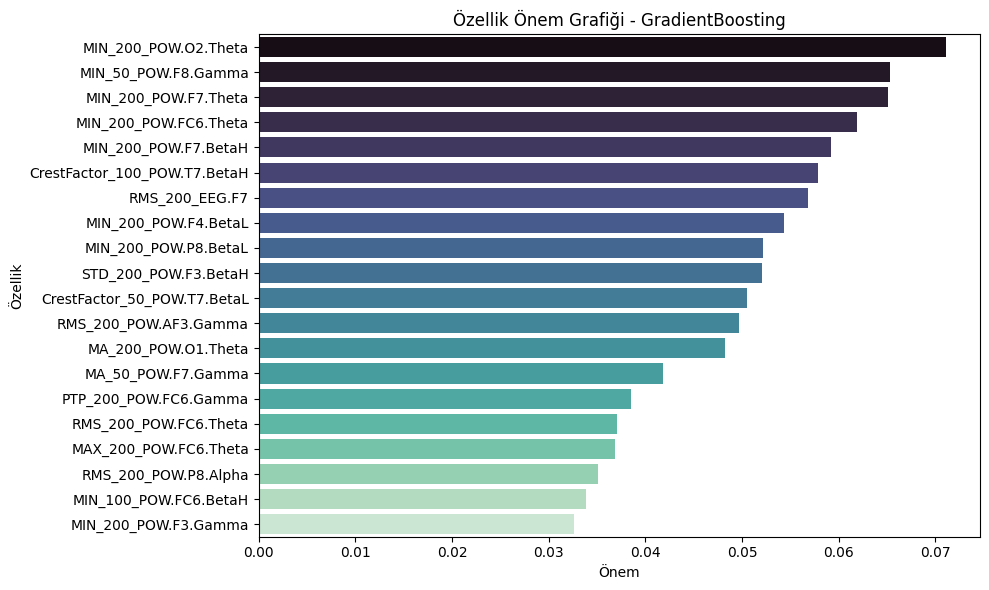

In [ ]:
#ESRB için en iyi modeli seç
best_model_info = get_best_model_info(ESRB_results[k]["results"])
selected_mask = PEGI_results[k]["selected_features"]
X_test = PEGI_results[k]["X_test"]
y_test = PEGI_results[k]["y_test"]
#ESRB için model sonuçlarını çiz
plot_model_results(best_model_info, X_test, y_test, selected_mask, eeg_scaled_df.columns)
